In [3]:
'''
In the example, a person will try to decide if he/she should go to a comedy show or not.

Luckily our example person has registered every time there was a comedy show in town, 
and registered some information about the comedian, and also registered if he/she went or not.
'''
import pandas as pd
df=pd.read_csv("D:\\datadecision.csv")
#df

In [4]:
'''
To make a decision tree, all data has to be numerical.

We have to convert the non numerical columns 'Nationality' and 'Go' into numerical values.
'''
d={'UK':0,'USA':1,'N':2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,0,0
1,42,12,4,1,0
2,23,4,6,2,0
3,52,4,4,1,0
4,43,21,8,1,1
5,44,14,5,0,0
6,66,3,7,2,1
7,35,14,9,0,1
8,52,13,7,2,1
9,35,5,9,2,1


In [6]:
'''
Then we have to separate the feature columns from the target column.

The feature columns are the columns that we try to predict from, 
and the target column is the column with the values we try to predict.
'''
features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']
#X
#y

0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64

[Text(0.2857142857142857, 0.9, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.42857142857142855, 0.7, 'Rank <= 8.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5714285714285714, 0.5, 'Age <= 35.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7142857142857143, 0.3, 'Experience <= 9.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8571428571428571, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

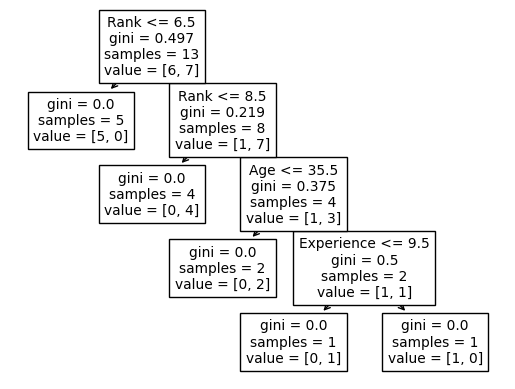

In [7]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

#Initializing the model
dtree = DecisionTreeClassifier()
#Training the model
dtree = dtree.fit(X, y)

#Visualizing
tree.plot_tree(dtree, feature_names=features)

In [ ]:
'''
Explaination of above diagram and how the decision tree has been created by algorithm internally 

Rank
Rank <= 6.5 means that every comedian with a rank of 6.5 or lower will follow the True arrow (to the left), and the rest will follow the False arrow (to the right).

gini = 0.497 refers to the quality of the split, and is always a number between 0.0 and 0.5, where 0.0 would mean all of the samples got the same result, and 0.5 would mean that the split is done exactly in the middle.

samples = 13 means that there are 13 comedians left at this point in the decision, which is all of them since this is the first step.

value = [6, 7] means that of these 13 comedians, 6 will get a "NO", and 7 will get a "GO".


Gini
There are many ways to split the samples, we use the GINI method in this example.

The Gini method uses this formula:

Gini = 1 - (x/n)2 - (y/n)2

Where x is the number of positive answers("GO"), n is the number of samples, and y is the number of negative answers ("NO"), which gives us this calculation:

1 - (7 / 13)2 - (6 / 13)2 = 0.497

'''


In [10]:
#We can use the Decision Tree to predict new values.
#Example: Should I go see a show starring a 40 years old American comedian, 
#with 10 years of experience, and a comedy ranking of 7?
print(dtree.predict([[40,10,7,1]]))

#Output 1 means GO if it's 0 No or not GO

[1]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [11]:
print(dtree.predict([[40,10,6,1]]))

[0]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [13]:
#Another Example of Decision Tree using diabetes dataset diabetes.csv
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("D:\\Downloads\\diabetesdataset\\diabetes.csv")
#df.head()
print("Initial shape:", df.shape) #No of rows and columns will be displayed

Initial shape: (768, 9)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
#Features
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols] = df[cols].replace(0, np.nan)
df.fillna(df.median(), inplace=True)

print("\nMissing values after cleaning:\n", df.isnull().sum())



Missing values after cleaning:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [20]:
df['BMI_Age'] = df['BMI'] * df['Age']
df['Glucose_Insulin_Ratio'] = df['Glucose'] / (df['Insulin']+1)

print("\nNew features:\n", df[['BMI_Age', 'Glucose_Insulin_Ratio']].head())


New features:
    BMI_Age  Glucose_Insulin_Ratio
0   1680.0               1.174603
1    824.6               0.674603
2    745.6               1.452381
3    590.1               0.936842
4   1422.3               0.810651


In [21]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

print("\nTraining size:", X_train.shape)
print("Test size:", X_test.shape)


Training size: (614, 10)
Test size: (154, 10)


In [23]:
#X_scaled or Z Score = (X - mean) / standard_deviation
from sklearn.preprocessing import StandardScaler #Importing the module
scaler = StandardScaler() #Initializing the class or Creating instance of StandardScaler class
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
#Model Creation
model = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=20,
    class_weight='balanced',  
    random_state=42
)

model.fit(X_train_scaled, y_train) #Training the model

DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_samples_split=20, random_state=42)

In [25]:
#Predict and Evaluate the model
from sklearn.metrics import (accuracy_score, classification_report, 
                           confusion_matrix, roc_auc_score)
#Passing the test data to model to predict the output
y_pred = model.predict(X_test_scaled)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(pd.crosstab(y_test, y_pred, 
      rownames=['Actual'], 
      colnames=['Predicted']))

Accuracy: 0.7077922077922078
ROC AUC: 0.740925925925926

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.63      0.74       100
           1       0.55      0.85      0.67        54

    accuracy                           0.71       154
   macro avg       0.72      0.74      0.70       154
weighted avg       0.77      0.71      0.71       154


Confusion Matrix:
Predicted   0   1
Actual           
0          63  37
1           8  46


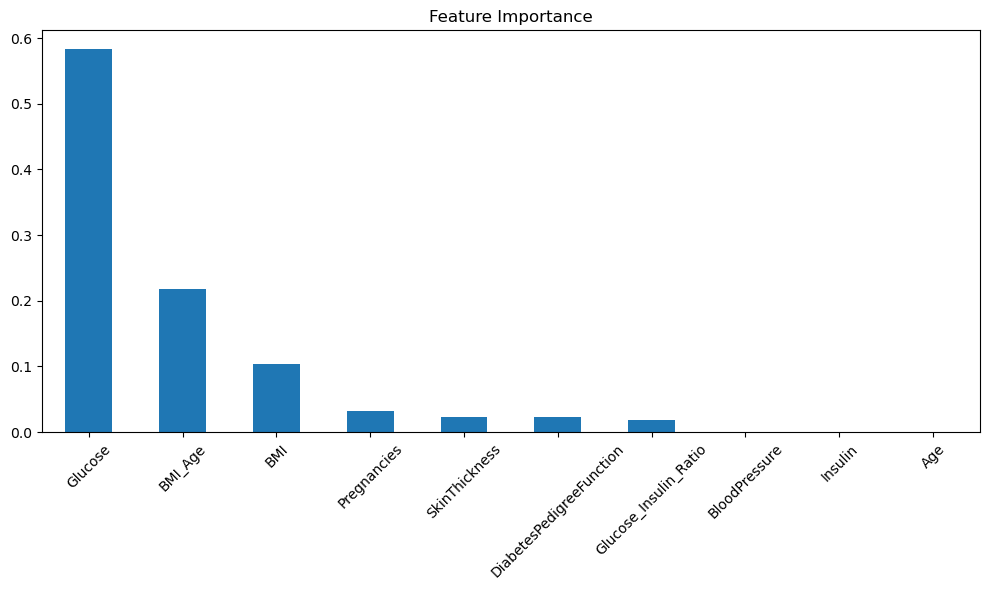

In [26]:
import matplotlib.pyplot as plt

importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
importances.plot(kind='bar')
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()